In [401]:
import json
import pickle
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor


In [402]:
# Feature Engineering
df = pd.read_csv('/home/akeemlag/Downloads/processes2.csv')
df.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399


In [403]:
df.columns

Index(['Unnamed: 0', 'name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'seats', 'max_power (in bph)',
       'Mileage Unit', 'Mileage', 'Engine (CC)'],
      dtype='object')

In [420]:
"""ANLYSIS"""
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float', 'int']).columns

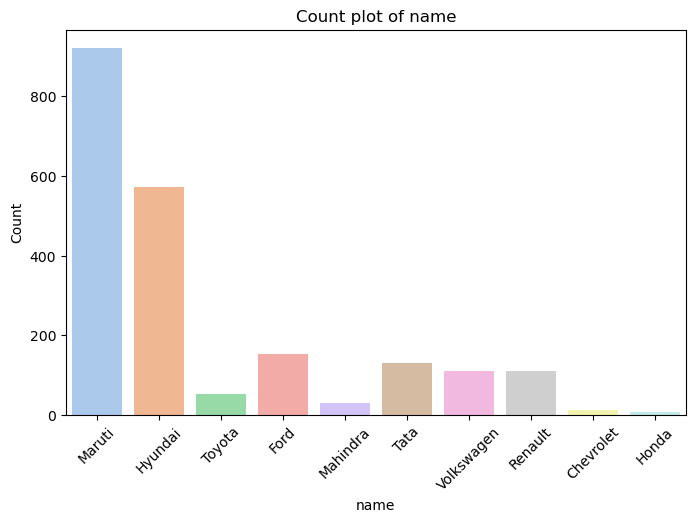

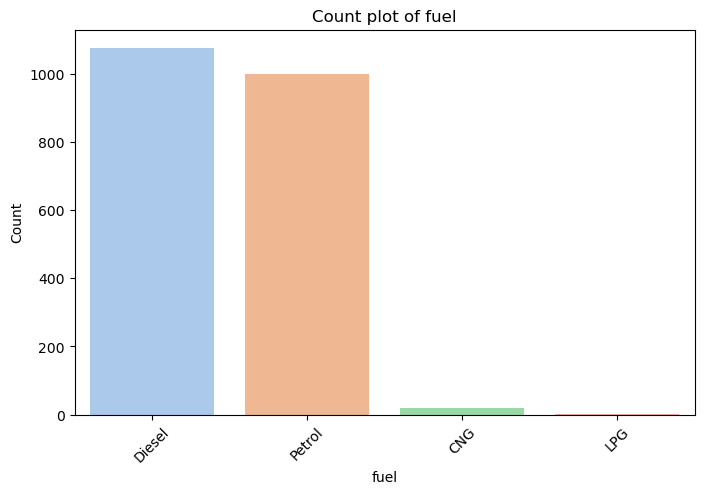

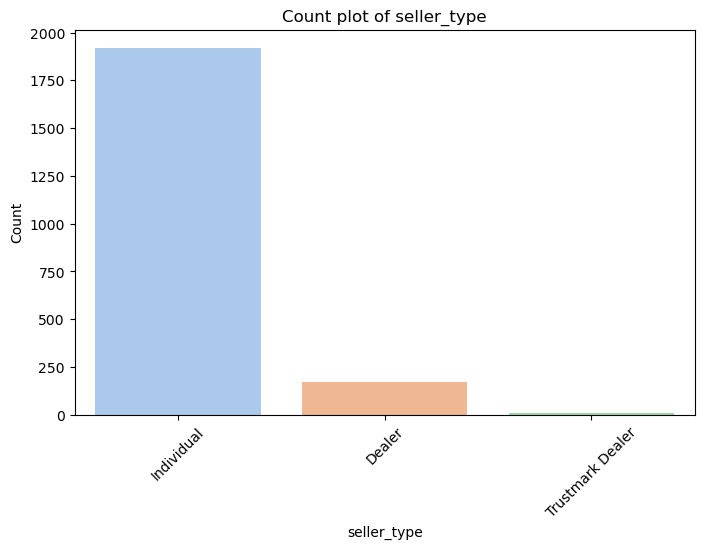

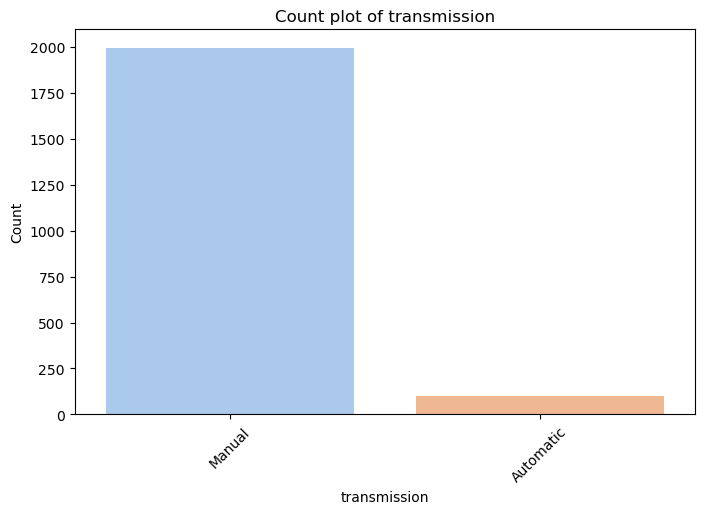

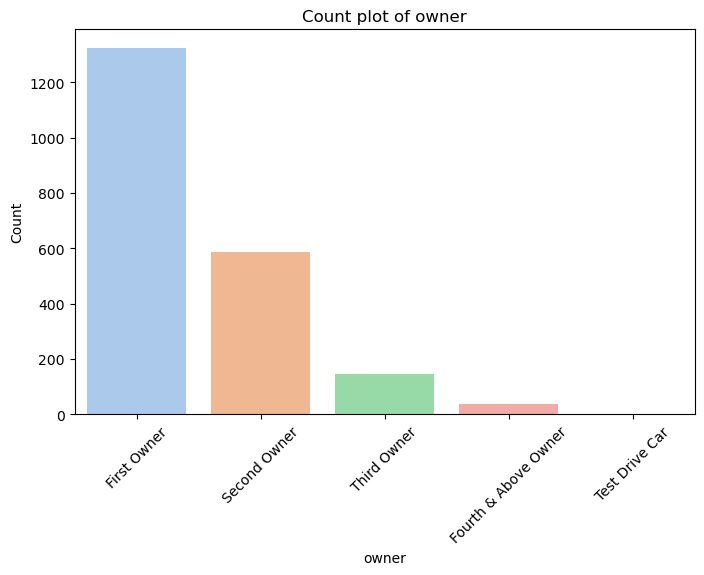

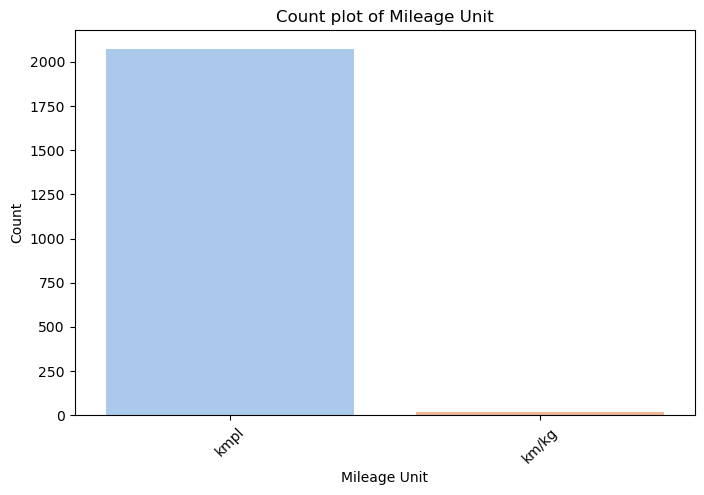

In [419]:
for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=col, hue=col, palette='pastel')
    plt.title(f'Count plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

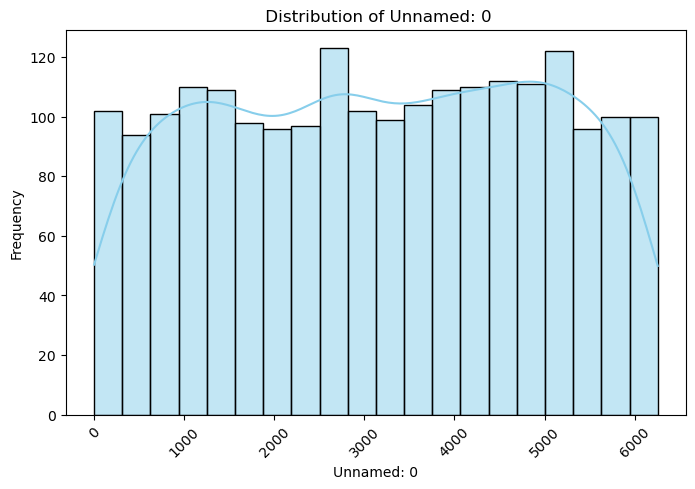

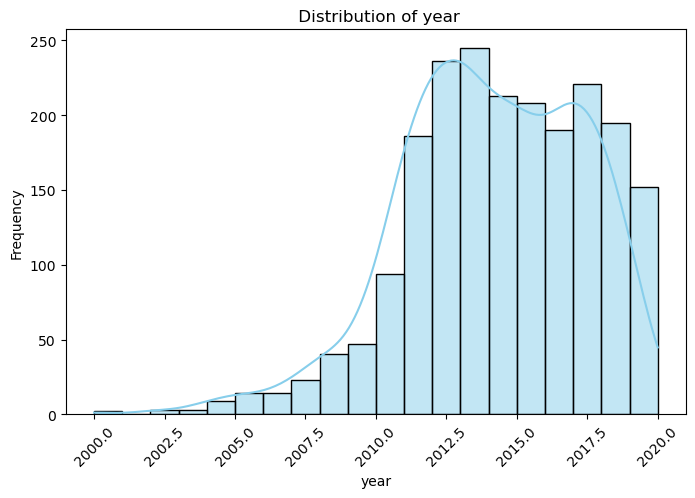

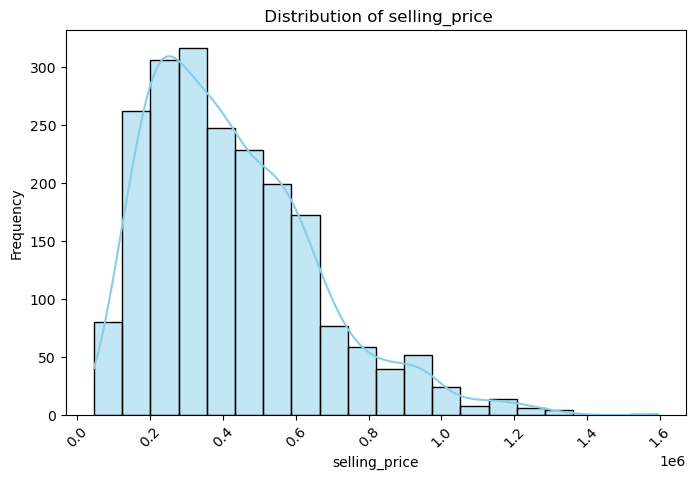

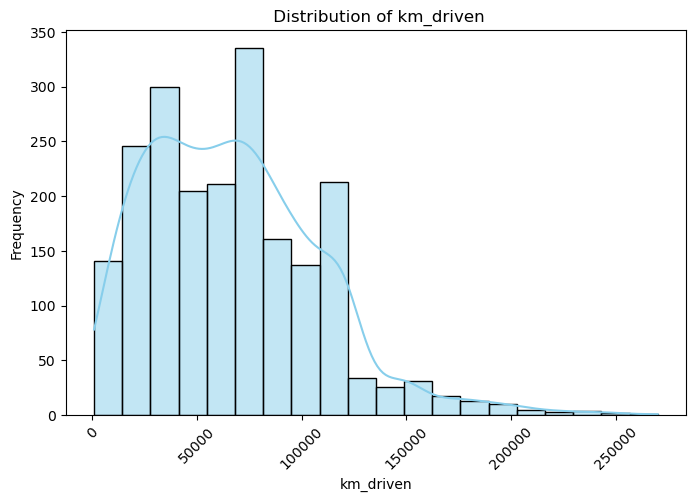

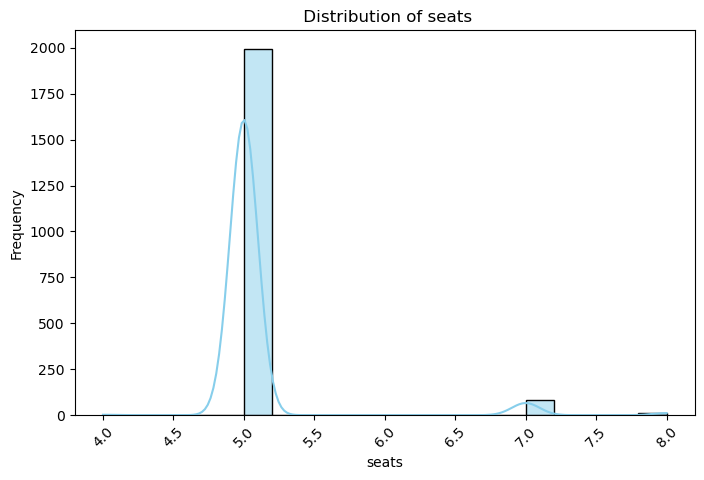

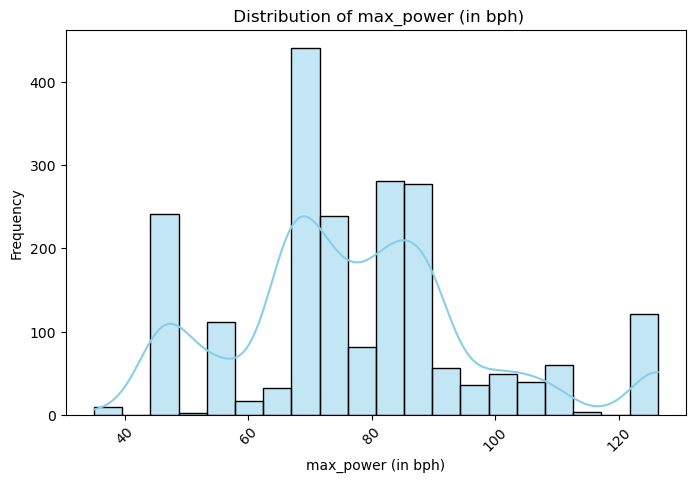

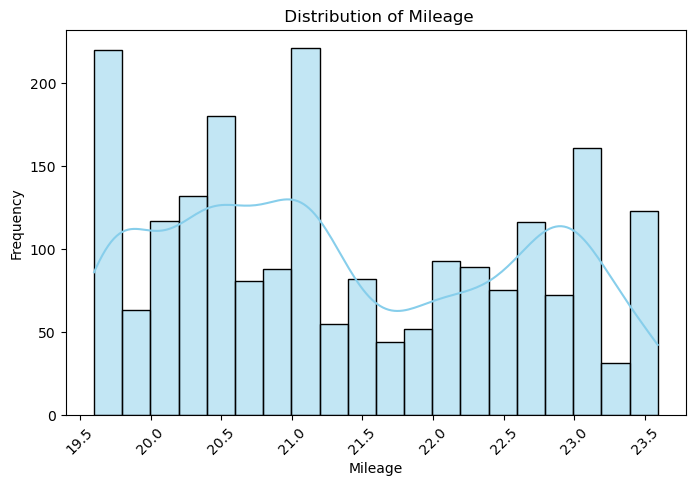

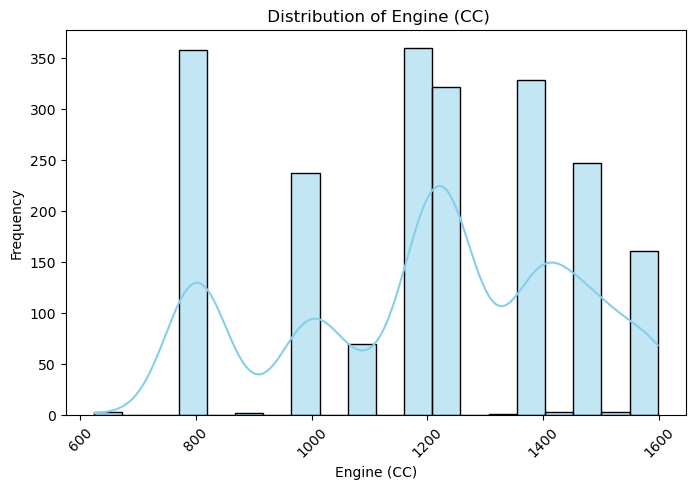

In [422]:
for col in numerical_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], bins=20, color='skyblue', kde=True)
    plt.title(f' Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

In [404]:
# Dropping mileafe because it does not reflect the true value in comparison with the km_drivem
cols_to_drop = ['Unnamed: 0', 'max_power (in bph)', 'seats', 'Mileage Unit', 'seller_type', 'Engine (CC)', 'Mileage']
df1 = df.drop(cols_to_drop, axis='columns')

In [405]:
df1.head()

,name,year,selling_price,km_driven,fuel,transmission,owner
0,Maruti,2014,450000,145500,Diesel,Manual,First Owner
1,Hyundai,2010,225000,127000,Diesel,Manual,First Owner
2,Hyundai,2017,440000,45000,Petrol,Manual,First Owner
3,Toyota,2011,350000,90000,Diesel,Manual,First Owner
4,Ford,2013,200000,169000,Diesel,Manual,First Owner


In [406]:
# Check if there are null cols
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2095 non-null   object
 1   year           2095 non-null   int64 
 2   selling_price  2095 non-null   int64 
 3   km_driven      2095 non-null   int64 
 4   fuel           2095 non-null   object
 5   transmission   2095 non-null   object
 6   owner          2095 non-null   object
dtypes: int64(3), object(4)
memory usage: 114.7+ KB


In [407]:
df1.describe()

,year,selling_price,km_driven
count,2095.000000,2.095000e+03,2095.000000
mean,2014.052506,4.272799e+05,67413.593795
std,3.273451,2.326698e+05,41580.846333
min,2000.000000,4.595700e+04,1000.000000
25%,2012.000000,2.500000e+05,35000.000000
50%,2014.000000,3.900000e+05,60000.000000
75%,2017.000000,5.555000e+05,90000.000000
max,2020.000000,1.594000e+06,270000.000000


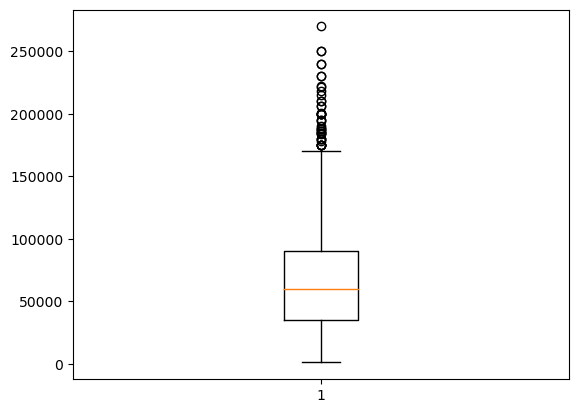

In [408]:
# Plot a boxplot to see the outliers in the km_driven
plt.boxplot(df1.km_driven);

In [409]:
df.selling_price.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2095 entries, 0 to 2094
Series name: selling_price
Non-Null Count  Dtype
--------------  -----
2095 non-null   int64
dtypes: int64(1)
memory usage: 16.5 KB


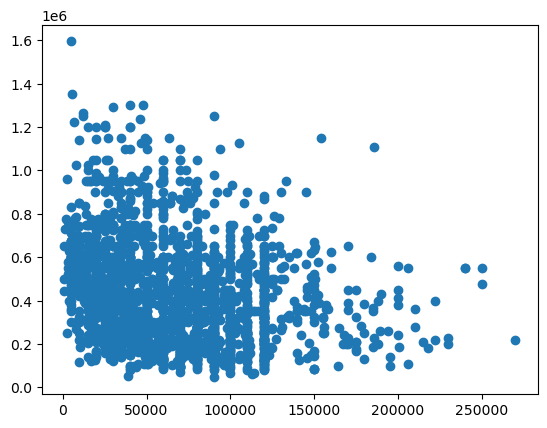

In [410]:
# plot a scatterplot to compare against price
plt.scatter(df1.km_driven, df1.selling_price);

In [411]:
# Remove outliers in the km_driven using zscore
df1['zscore'] = (df1.km_driven-df1.km_driven.mean())/df1.km_driven.std()
df1.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,zscore
0,Maruti,2014,450000,145500,Diesel,Manual,First Owner,1.877942
1,Hyundai,2010,225000,127000,Diesel,Manual,First Owner,1.433025
2,Hyundai,2017,440000,45000,Petrol,Manual,First Owner,-0.539036
3,Toyota,2011,350000,90000,Diesel,Manual,First Owner,0.543193
4,Ford,2013,200000,169000,Diesel,Manual,First Owner,2.443106


In [412]:
# Use zscore 3 to remove outliers
df2 = df1[(df1.zscore<3) & (df1.zscore>-3)]

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2071 entries, 0 to 2094
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           2071 non-null   object 
 1   year           2071 non-null   int64  
 2   selling_price  2071 non-null   int64  
 3   km_driven      2071 non-null   int64  
 4   fuel           2071 non-null   object 
 5   transmission   2071 non-null   object 
 6   owner          2071 non-null   object 
 7   zscore         2071 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 145.6+ KB


In [413]:
df2.describe()

,year,selling_price,km_driven,zscore
count,2071.000000,2.071000e+03,2071.000000,2071.000000
mean,2014.080637,4.284603e+05,65682.225978,-0.041639
std,3.267431,2.331769e+05,38501.798746,0.925950
min,2000.000000,4.595700e+04,1000.000000,-1.597216
25%,2012.000000,2.500000e+05,35000.000000,-0.779532
50%,2014.000000,3.900000e+05,60000.000000,-0.178293
75%,2017.000000,5.600000e+05,90000.000000,0.543193
max,2020.000000,1.594000e+06,190000.000000,2.948146


In [414]:
df2.head(10)

,name,year,selling_price,km_driven,fuel,transmission,owner,zscore
0,Maruti,2014,450000,145500,Diesel,Manual,First Owner,1.877942
1,Hyundai,2010,225000,127000,Diesel,Manual,First Owner,1.433025
2,Hyundai,2017,440000,45000,Petrol,Manual,First Owner,-0.539036
3,Toyota,2011,350000,90000,Diesel,Manual,First Owner,0.543193
4,Ford,2013,200000,169000,Diesel,Manual,First Owner,2.443106
5,Hyundai,2012,500000,53000,Diesel,Manual,Second Owner,-0.346640
6,Maruti,2002,150000,80000,Petrol,Manual,Second Owner,0.302697
7,Hyundai,2016,680000,100000,Diesel,Manual,First Owner,0.783688
8,Mahindra,2011,174000,100000,Diesel,Manual,Second Owner,0.783688
9,Maruti,2012,600000,72000,Diesel,Manual,First Owner,0.110301


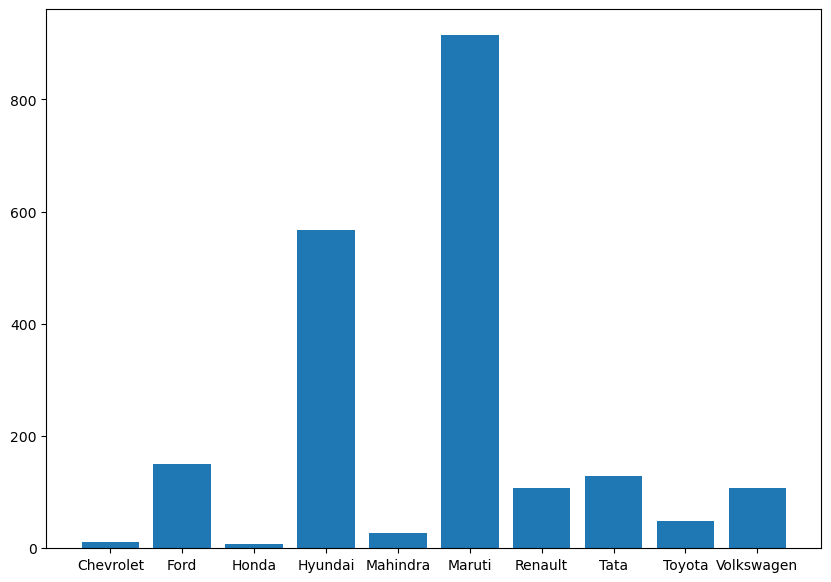

In [333]:
# Show occurences of each car name in the ds
x = df2.groupby('name')['name'].count().index
height = df2.groupby('name')['name'].count().values

plt.figure(figsize=(10,7))
plt.bar(x, height=height);

In [334]:
# get dummies for name
# Do label encoding for transimission
# Create another column for age from the year col, then remove the year col

In [335]:
# Create an age column
df2['age'] = df2.year.apply(lambda x: datetime.now().year - x)

/tmp/ipykernel_6350/759065589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age'] = df2.year.apply(lambda x: datetime.now().year - x)


In [336]:
df2.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,zscore,age
0,Maruti,2014,450000,145500,Diesel,Manual,First Owner,1.877942,10
1,Hyundai,2010,225000,127000,Diesel,Manual,First Owner,1.433025,14
2,Hyundai,2017,440000,45000,Petrol,Manual,First Owner,-0.539036,7
3,Toyota,2011,350000,90000,Diesel,Manual,First Owner,0.543193,13
4,Ford,2013,200000,169000,Diesel,Manual,First Owner,2.443106,11


In [337]:
# Drop year col and zscore col
cols_to_drop = ['year', 'zscore']
df3 = df2.drop(cols_to_drop, axis=1)
df3.head()

,name,selling_price,km_driven,fuel,transmission,owner,age
0,Maruti,450000,145500,Diesel,Manual,First Owner,10
1,Hyundai,225000,127000,Diesel,Manual,First Owner,14
2,Hyundai,440000,45000,Petrol,Manual,First Owner,7
3,Toyota,350000,90000,Diesel,Manual,First Owner,13
4,Ford,200000,169000,Diesel,Manual,First Owner,11


In [338]:
df2.fuel.unique()

array(['Diesel', 'Petrol', 'CNG', 'LPG'], dtype=object)

In [339]:
# Use LabelEncoder for fuel
# Create an instance of LabelEncoder()
le = LabelEncoder()

In [340]:
df3.fuel = le.fit_transform(df3.fuel)

In [341]:
df3.owner = le.fit_transform(df3.owner)

In [342]:
df3.head(10)

,name,selling_price,km_driven,fuel,transmission,owner,age
0,Maruti,450000,145500,1,Manual,0,10
1,Hyundai,225000,127000,1,Manual,0,14
2,Hyundai,440000,45000,3,Manual,0,7
3,Toyota,350000,90000,1,Manual,0,13
4,Ford,200000,169000,1,Manual,0,11
5,Hyundai,500000,53000,1,Manual,2,12
6,Maruti,150000,80000,3,Manual,2,22
7,Hyundai,680000,100000,1,Manual,0,8
8,Mahindra,174000,100000,1,Manual,2,13
9,Maruti,600000,72000,1,Manual,0,12


In [343]:
df3.owner.unique()

array([0, 2, 4, 1, 3])

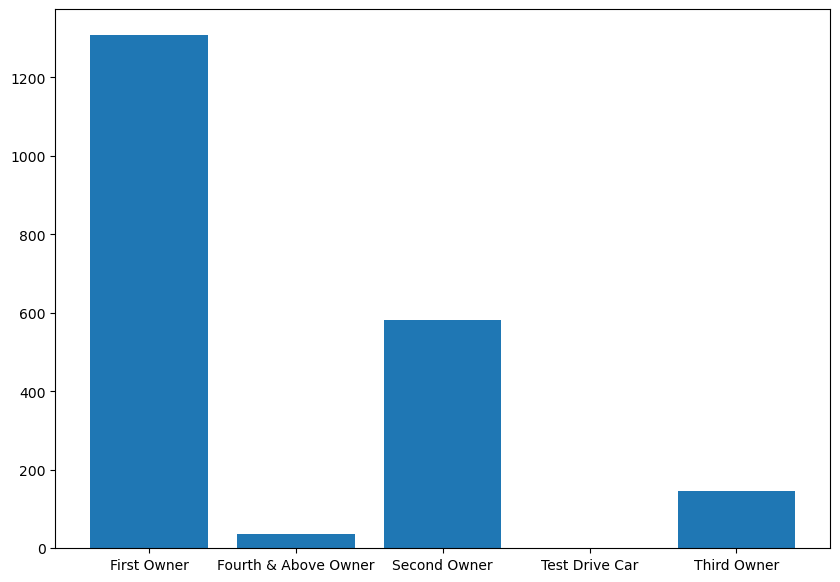

In [344]:
# Show of a plot of occurences
x = df2.groupby('owner')['owner'].count().index
height = df2.groupby('owner')['owner'].count().values

plt.figure(figsize=(10,7))
plt.bar(x, height=height);

In [345]:
# Use one-hot encoding (dummies) for owner and model
trans_dummies = pd.get_dummies(df3.transmission, dtype=int, drop_first=True)
name_dummies = pd.get_dummies(df3.name, dtype=int, drop_first=True)
df4 = pd.concat([df3, trans_dummies, name_dummies], axis=1)

In [346]:
df4.head()

,name,selling_price,km_driven,fuel,transmission,owner,age,Manual,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Tata,Toyota,Volkswagen
0,Maruti,450000,145500,1,Manual,0,10,1,0,0,0,0,1,0,0,0,0
1,Hyundai,225000,127000,1,Manual,0,14,1,0,0,1,0,0,0,0,0,0
2,Hyundai,440000,45000,3,Manual,0,7,1,0,0,1,0,0,0,0,0,0
3,Toyota,350000,90000,1,Manual,0,13,1,0,0,0,0,0,0,0,1,0
4,Ford,200000,169000,1,Manual,0,11,1,1,0,0,0,0,0,0,0,0


In [347]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2071 entries, 0 to 2094
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2071 non-null   object
 1   selling_price  2071 non-null   int64 
 2   km_driven      2071 non-null   int64 
 3   fuel           2071 non-null   int64 
 4   transmission   2071 non-null   object
 5   owner          2071 non-null   int64 
 6   age            2071 non-null   int64 
 7   Manual         2071 non-null   int64 
 8   Ford           2071 non-null   int64 
 9   Honda          2071 non-null   int64 
 10  Hyundai        2071 non-null   int64 
 11  Mahindra       2071 non-null   int64 
 12  Maruti         2071 non-null   int64 
 13  Renault        2071 non-null   int64 
 14  Tata           2071 non-null   int64 
 15  Toyota         2071 non-null   int64 
 16  Volkswagen     2071 non-null   int64 
dtypes: int64(15), object(2)
memory usage: 291.2+ KB


In [348]:
# Drop name and owner cols
cols_to_drop = ['name', 'transmission']
df5 = df4.drop(cols_to_drop, axis=1)
df5.head()

,selling_price,km_driven,fuel,owner,age,Manual,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Tata,Toyota,Volkswagen
0,450000,145500,1,0,10,1,0,0,0,0,1,0,0,0,0
1,225000,127000,1,0,14,1,0,0,1,0,0,0,0,0,0
2,440000,45000,3,0,7,1,0,0,1,0,0,0,0,0,0
3,350000,90000,1,0,13,1,0,0,0,0,0,0,0,1,0
4,200000,169000,1,0,11,1,1,0,0,0,0,0,0,0,0


In [349]:
# Create feature matrix and target vector
X = df5.drop('selling_price', axis=1)
y = df5.selling_price

In [350]:
# Scale our feature matrix
X

,km_driven,fuel,owner,age,Manual,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Tata,Toyota,Volkswagen
0,145500,1,0,10,1,0,0,0,0,1,0,0,0,0
1,127000,1,0,14,1,0,0,1,0,0,0,0,0,0
2,45000,3,0,7,1,0,0,1,0,0,0,0,0,0
3,90000,1,0,13,1,0,0,0,0,0,0,0,1,0
4,169000,1,0,11,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,12000,3,0,7,1,0,0,0,0,1,0,0,0,0
2091,50000,1,0,10,1,0,0,0,0,0,0,0,1,0
2092,73000,3,0,13,1,0,0,0,0,1,0,0,0,0
2093,80000,3,0,7,1,0,0,0,0,1,0,0,0,0


In [351]:
scaler = StandardScaler()

In [352]:
min_max_scaler = MinMaxScaler()

In [353]:
X_scaled = min_max_scaler.fit_transform(X)

In [386]:
X_scaled = scaler.fit_transform(X)

In [387]:
# Split our data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.2)

In [389]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [390]:
def get_best_model(X_train,y_train):
    model_params = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'n_jobs': [1,2,3]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decission_tree_reg': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['poisson', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    for model_name, mp in model_params.items():
        gs = GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
        gs.fit(X_train, y_train)
        scores.append({
            'model_name': model_name,
            'best_params': gs.best_params_,
            'best_score': gs.best_score_
        })
    return pd.DataFrame(scores, columns=['model_name', 'best_params', 'best_score'])


get_best_model(X_train, y_train)

/home/akeemlag/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.595e+12, tolerance: 7.257e+09
  model = cd_fast.enet_coordinate_descent(
/home/akeemlag/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.432e+10, tolerance: 7.368e+09
  model = cd_fast.enet_coordinate_descent(
/home/akeemlag/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

,model_name,best_params,best_score
0,linear_regression,{'n_jobs': 1},0.642694
1,lasso,"{'alpha': 1, 'selection': 'cyclic'}",0.642694
2,decission_tree_reg,"{'criterion': 'poisson', 'splitter': 'random'}",0.595147


In [382]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [383]:
lr.score(X_test, y_test)

0.6207677909620546

In [384]:
X.columns

Index(['km_driven', 'fuel', 'owner', 'age', 'Manual', 'Ford', 'Honda',
       'Hyundai', 'Mahindra', 'Maruti', 'Renault', 'Tata', 'Toyota',
       'Volkswagen'],
      dtype='object')

In [396]:
X_train_prediction = lr.predict(X_train)
training_data_accuracy = mean_absolute_error(y_train, X_train_prediction)

In [394]:
X_train_prediction

array([354584.55436763, 709739.2906605 , 321195.1163162 , ...,
       510689.61663832, 594469.05935272, 438474.10728065])

In [397]:
training_data_accuracy

106438.96568295646

In [385]:
# def get_predict_price(km_driven, fuel, age, manual, model)